In [1]:
import scipy
from scipy.constants import pi
import numpy as np
import math
import time
import random
import os
#import seaborn as sns
import matplotlib.pylab as plt

In [2]:
# defining U(t) function where 0<t<delta
def U_func(omega, t, p_0, q_0, mu_1):
    return q_0*np.cos(omega*t) + np.sin(omega*t)*((p_0 + 2*mu_1*q_0)/omega)

def lorentzian_dist(x, x0, a, gam):
    return a * gam**2 / ((0.5 * gam)**2 + (x - x0)**2)

def inverse_transform_sampling(num_samples, x0, a, gam):
    u = np.random.uniform(size=int(num_samples))
    samples = x0 + a * gam * np.tan(np.pi * (u - 0.5))
    return samples

### my code that works ###
def random_choice(x_ls, distributions, N0):
    random_number = random.choices(x_ls, distributions, k=int(N0))
    return random_number


# def sample_lorentzian_dist(x0, gam, num_samples):
#     uniform_samples = np.random.uniform(0, 1, int(num_samples))  # Generate uniform random numbers between 0 and 1
#     samples = x0 + gam * np.tan(np.pi * (uniform_samples - 0.5))  # Apply inverse transform sampling
#     return samples

# def pdf_lorentzian_dist(x, x0, a, gam):
#     return lorentzian_dist(samples, x0, a, gam)

# # Define the parameters for the Lorentzian distribution
# # x0 = 7.5  # Location parameter
# # a = 1/np.pi   # Scale parameter
# # gam = 0.5  # Shape parameter

# # samples = sample_lorentzian_dist(x0, gam, num_samples)
# # pdf_values = pdf_lorentzian_dist(samples, x0, a, gam)

# # # Generate random samples from the Lorentzian distribution
# # num_samples = 1e5  # Specify the desired number of samples
# # uniform_samples = np.random.uniform(0, 1, int(num_samples))  # Generate uniform random numbers between 0 and 1
# # samples = x0 + gam * np.tan(np.pi * (uniform_samples - 0.5))  # Apply inverse transform sampling

# # # Calculate the corresponding probability density for each sample
# # pdf_values = lorentzian_dist(samples, x0, a, gam)

# # # Print the first 10 samples and their corresponding PDF values
# # for i in range(10):
# #     print(f"Sample: {samples[i]}, PDF Value: {pdf_values[i]}")


# def sample_lorentzian_cauchy(num_samples, x0, a, gam):
#     samples = np.random.standard_cauchy(num_samples)  # Use standard Cauchy distribution for sampling
#     samples = x0 + (a * gam * samples)  # Apply scaling and shift to the samples
#     return samples


def gaussian_dist(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma)**2) / (np.sqrt(2 * np.pi) * sigma)

def sample_lorentzian(num_samples, x0, a, gam, gaussian_sig_scale):
    samples = []
    while len(samples) < num_samples:
        # Generate samples from the proposal Gaussian distribution with a larger standard deviation
        x_proposal = np.random.normal(loc=x0, scale=gam * gaussian_sig_scale)  # Increase the scaling factor (e.g., 10)

        # Calculate the acceptance ratio
        acceptance_ratio = lorentzian_dist(x_proposal, x0, a, gam) / gaussian_dist(x_proposal, x0, gam*gaussian_sig_scale)  # Update the scaling factor
        #acceptance_ratio = lorentzian_dist(x_proposal, x0, a, gam) / gaussian_dist(x_proposal, x0, gam)

        # Generate a uniform random number
        u = np.random.uniform()

        # Accept or reject the sample
        if u < acceptance_ratio:
            samples.append(x_proposal)

    return samples


In [3]:
### parameters for the Lorentzian distribution

omega_0 = 7.5
gamma = 0.5
a = 1/np.pi
gauss_sig_scale = 1
### parameters of the forces acting on the oscillators
mu1 = 5
mu2 = 2.5
Delta = 10

### initial condition of the oscillator
p0 = 10
q0 = 25
N0 = 1e4


### sample from lorentzian distribution ###

dist_x_ls = np.r_[np.linspace(omega_0-1000, omega_0 - 5, 100), 
                  np.linspace(omega_0-5, omega_0 + 5, 1000),
                  np.linspace(omega_0+5, omega_0 + 1000, 100)]

dist = lorentzian_dist(dist_x_ls, omega_0,
                       1/np.pi, gamma)

#print (dist)
rand_sample = random_choice(dist_x_ls, dist, N0)
print (np.min(rand_sample), np.max(rand_sample))

"""
rand_sample_0 = sample_lorentzian_dist(omega_0, gamma, N0)#sample_lorentzian(N0-5000, omega_0, a, gamma, gauss_sig_scale)#
gauss_sig_scale=20
rand_sample_1 = sample_lorentzian(5000, omega_0, a, gamma, gauss_sig_scale)
rand_sample = np.r_[rand_sample_0, rand_sample_1]
"""
"""
# Generate samples from the Lorentzian distribution
rand_sample = inverse_transform_sampling(N0, omega_0, a, gamma)
"""

2.5 12.5


'\n# Generate samples from the Lorentzian distribution\nrand_sample = inverse_transform_sampling(N0, omega_0, a, gamma)\n'

In [4]:
# dist_x_ls
# dist
#print (rand_sample)

2.5 12.5


(0.0, 15.0)

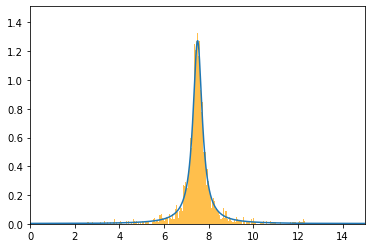

In [5]:
plt.plot(dist_x_ls, dist)
#plt.xlim(0,15)
num_bins = 1000
red_samples = [sample_i for sample_i in rand_sample if abs(sample_i) < 500]

n, bins, patches = plt.hist(red_samples, num_bins, 
                            density = 1,
                            color = "orange", 
                            alpha = 0.7)
print (np.min(rand_sample), np.max(rand_sample))
plt.xlim(0,15)

In [6]:
# Time scale
t_mesh = 1000
t_ut = np.linspace(0, Delta, t_mesh)

Ut_sum = 0.0
for i in range(len(rand_sample)):
    omega_i = rand_sample[i]
    Ut_i = U_func(omega_i, t_ut, p0, q0, mu1)
    Ut_sum += Ut_i


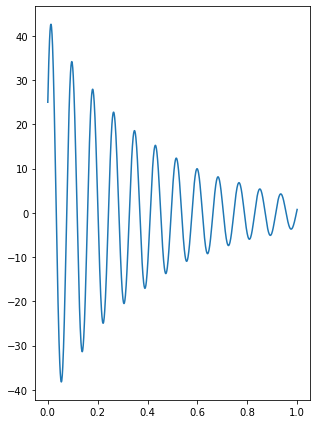

In [7]:
fig, ax = plt.subplots(1,1,figsize=(4.5, 6), tight_layout = True)
ax.plot(t_ut/Delta, Ut_sum/len(rand_sample))


In [8]:
#def U_func(omega, t, p_0, q_0, mu_1):

def Q_func(omega, t, p_0, q_0, mu_1, mu_2, delta_):
    U_t_result = U_func(omega, t, p_0, q_0, mu_1)
    U_delta_result = U_func(omega, delta_, p_0, q_0, mu_1)
    return U_t_result + (np.sin(omega*(t-delta_))*((2*mu_2*U_delta_result)/omega))
    

In [9]:
# Time scale
t_mesh = 1000
t_qt = np.linspace(Delta, 3*Delta, 2*t_mesh)

Qt_sum = 0.0
for i in range(len(rand_sample)):
    omega_i = rand_sample[i]
    Qt_i = Q_func(omega_i, t_qt, p0, q0, mu1, mu2, Delta)
    Qt_sum += Qt_i
    

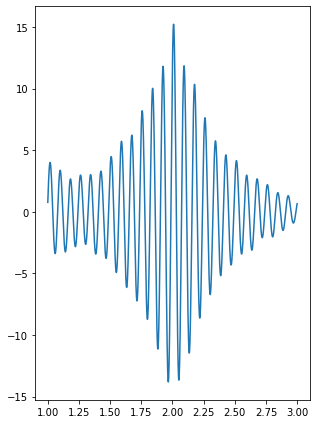

In [10]:
fig, ax = plt.subplots(1,1,figsize=(4.5, 6), tight_layout = True)
ax.plot(t_qt/Delta, Qt_sum/len(rand_sample))


Text(0.5, 0, '$t/\\Delta$')

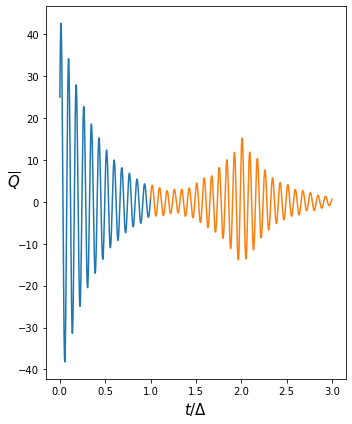

In [11]:
fig, ax = plt.subplots(1,1,figsize=(5, 6), tight_layout = True)
ax.plot(t_ut/Delta, Ut_sum/len(rand_sample))
ax.plot(t_qt/Delta, Qt_sum/len(rand_sample))

ax.set_ylabel(r"$\overline{Q}$", rotation=0, fontsize=15)
ax.set_xlabel(r"$t/\Delta$", fontsize=15)


In [12]:
#def U_func(omega, t, p_0, q_0, mu_1):

#def Q_func(omega, t, p_0, q_0, mu_1, mu_2, delta_):

def dot_ut(omega, t, p_0, q_0, mu_1):
    return (-omega*q_0*np.sin(omega*t))+(p_0+2*mu_1*q_0)*np.cos(omega*t)

def dot_qt(omega, t, p_0, q_0, mu_1, mu_2, delta_):
    Ut_dot= dot_ut(omega, t, p_0, q_0, mu_1)
    U_delta_ = U_func(omega, delta_, p_0, q_0, mu_1)
    return Ut_dot + 2*mu_2*U_delta_*np.cos(omega*(t-delta_))

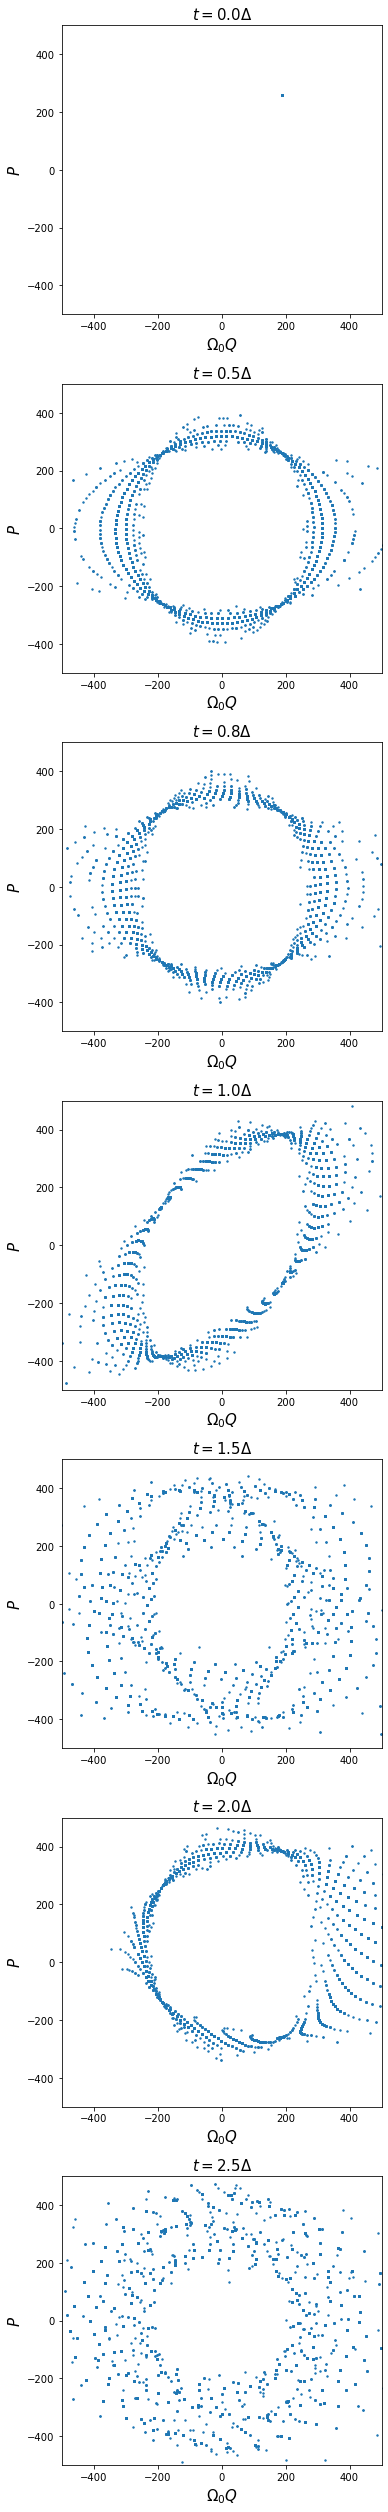

In [13]:
t_snapshot_ls = [0, 0.5*Delta, 0.8*Delta, Delta, 1.5*Delta, 2*Delta, 2.5*Delta]

fig, ax = plt.subplots(len(t_snapshot_ls),1,
                       figsize=(5.5, len(t_snapshot_ls)*5), 
                       tight_layout = True)

for j in range(len(t_snapshot_ls)):
    t_i = t_snapshot_ls[j]
    if t_i < Delta:
        qp_ls = np.zeros((len(rand_sample),2))
        for i in range(len(rand_sample)):
            omega_i = rand_sample[i]
            Ut_i = U_func(omega_i, t_i, p0, q0, mu1)
            dot_ut_i = dot_ut(omega_i, t_i, p0, q0, mu1)
            
            qp_ls[i,:] =[omega_0*Ut_i, dot_ut_i]
        ax[j].scatter(qp_ls[:,0],qp_ls[:,1], s= 2)
        
    elif t_i >= Delta:
        qp_ls = np.zeros((len(rand_sample),2))
        for i in range(len(rand_sample)):
            omega_i = rand_sample[i]
            Qt_i = Q_func(omega_i, t_i, p0, q0, mu1, mu2, Delta)
            dot_qt_i = dot_qt(omega_i, t_i, p0, q0, mu1, mu2, Delta)
            
            qp_ls[i,:] =[omega_0*Qt_i, dot_qt_i]
        
        ax[j].scatter(qp_ls[:,0],qp_ls[:,1], s= 2)
    ax[j].set_title(r"$t = %s \Delta$"%(t_i/Delta), fontsize=15)
    ax[j].set_ylabel(r"$P$", fontsize=15)
    ax[j].set_xlabel(r"$\Omega_0 Q$", fontsize=15)
    
    ax[j].set_xlim(-500,500)
    ax[j].set_ylim(-500,500)

In [14]:
# quantum echo
#(omega, t, p_0, q_0, mu_1, mu_2, delta_)
### parameters for the Lorentzian distribution
from scipy.constants import hbar
omega_0 = 7.5
gamma = 0.5
a = 1/np.pi
gauss_sig_scale = 1
### parameters of the forces acting on the oscillators
mu1 = 5
mu2 = 2.5
Delta = 10

### initial condition of the oscillator
p0 = 100
q0 = 25
N0 = 1e5


### sample from lorentzian distribution ###

dist_x_ls = np.r_[np.linspace(omega_0-1000, omega_0 - 5, 100), 
                  np.linspace(omega_0-5, omega_0 + 5, 1000),
                  np.linspace(omega_0+5, omega_0 + 1000, 100)]

dist = lorentzian_dist(dist_x_ls, omega_0,
                       1/np.pi, gamma)

#print (dist)
rand_sample = random_choice(dist_x_ls, dist, N0)
print (np.min(rand_sample), np.max(rand_sample))
def Sigma_func(omega, t, p_0, q_0, mu_1):
    term1 = 1 + (2*(mu_1**2))/(omega**2)
    term2 = np.sin(omega*t) * (2*mu_1/omega)
    term3 = np.cos(2*omega*t) * (2*(mu_1**2)/(omega**2))
    Xi_0 = hbar/(2*omega)
    return (term1+term2-term3)*Xi_0




2.5 62.75252525252525


In [15]:
# Time scale
t_mesh = 1000
t_Sigma_t = np.linspace(0, Delta, t_mesh)

Sigma_t_sum = 0.0
for i in range(len(rand_sample)):
    omega_i = rand_sample[i]
    Sigma_t_i = Sigma_func(omega_i, t_Sigma_t, p0, q0, mu1)
    Sigma_t_sum += Sigma_t_i


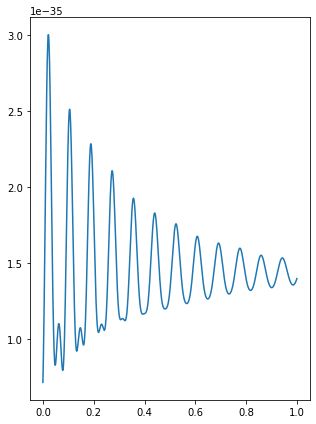

In [16]:
fig, ax = plt.subplots(1,1,figsize=(4.5, 6), tight_layout = True)
ax.plot(t_Sigma_t/Delta, Sigma_t_sum/len(rand_sample))
 